Dataset Loaded
   Unnamed: 0.1  Unnamed: 0  \
0             0           0   
1             1           1   
2             2           2   
3             3           3   
4             4           4   

                                                Text    Sentiment  \
0   Enjoying a beautiful day at the park!        ...   Positive     
1   Traffic was terrible this morning.           ...   Negative     
2   Just finished an amazing workout! 💪          ...   Positive     
3   Excited about the upcoming weekend getaway!  ...   Positive     
4   Trying out a new recipe for dinner tonight.  ...   Neutral      

             Timestamp            User     Platform  \
0  2023-01-15 12:30:00   User123          Twitter     
1  2023-01-15 08:45:00   CommuterX        Twitter     
2  2023-01-15 15:45:00   FitnessFan      Instagram    
3  2023-01-15 18:20:00   AdventureX       Facebook    
4  2023-01-15 19:55:00   ChefCook        Instagram    

                                     Hashtags  Retwe

<ipython-input-7-f2b67e1ee26c>:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sentiment', palette='pastel')


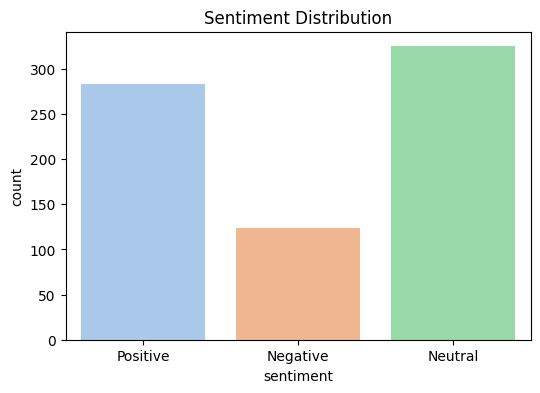

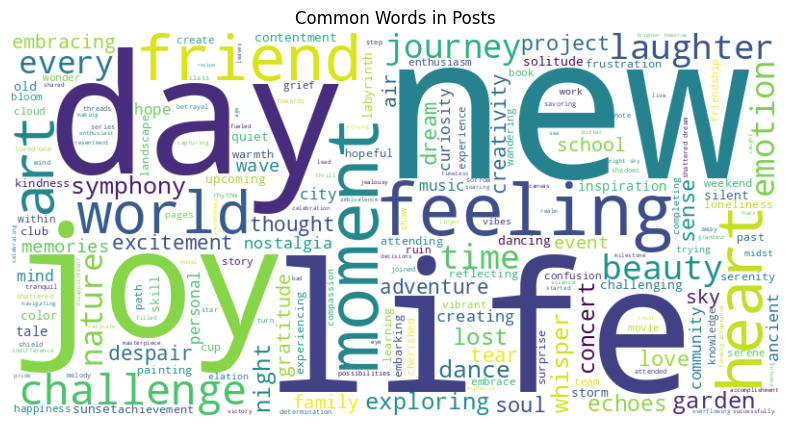

Processed data saved as 'processed_sentiment_data.csv'


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


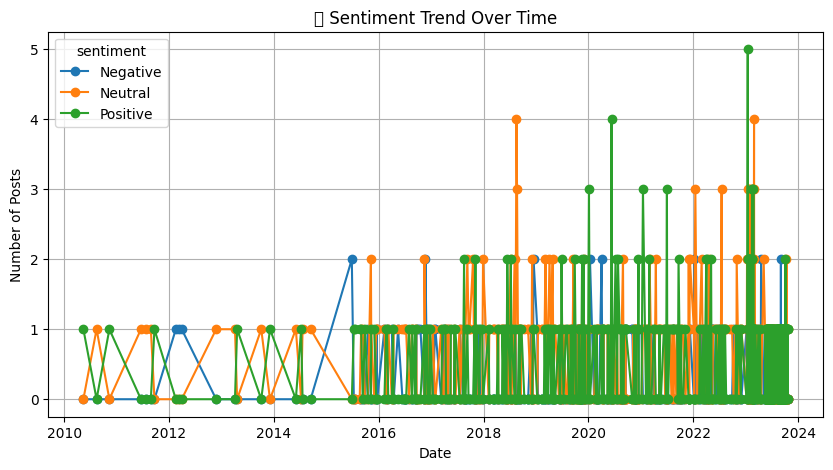

In [7]:
!pip install pandas textblob matplotlib seaborn wordcloud


# 📦 Step 1: Import Libraries
import pandas as pd
import re
from textblob import TextBlob
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns

# 📂 Step 2: Load Dataset
df = pd.read_csv("sentimentdataset.csv")  # Ensure it's in the same folder or give full path
print("Dataset Loaded")
print(df.head())
print("Columns:", df.columns)

# 🧹 Step 3: Preprocess Text
def clean_text(text):
    text = str(text)
    text = re.sub(r"http\S+|@\S+|#\S+", "", text)       # Remove links, mentions, hashtags
    text = re.sub(r"[^A-Za-z0-9\s]", "", text)          # Remove special characters
    return text.lower()

print(df.columns)  # to check the real name
  # change this to the actual column

# ⚠️ Replace 'text' with the actual text column name in your CSV
TEXT_COL = 'Text'  # Change this if your column name is different
df['cleaned_text'] = df[TEXT_COL].apply(clean_text)

# 🤖 Step 4: Sentiment Analysis using TextBlob
def get_sentiment(text):
    score = TextBlob(text).sentiment.polarity
    if score > 0:
        return 'Positive'
    elif score < 0:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment'] = df['cleaned_text'].apply(get_sentiment)

# 📊 Step 5: Visualize Sentiment Distribution
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='sentiment', palette='pastel')
plt.title("Sentiment Distribution")
plt.show()

# ☁️ Step 6: Generate Word Cloud
all_words = ' '.join(df['cleaned_text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Common Words in Posts")
plt.show()

# 📝 Step 7: Export Processed Data (Optional)
df.to_csv("processed_sentiment_data.csv", index=False)
print("Processed data saved as 'processed_sentiment_data.csv'")



# Assuming 'date' column exists
df['date'] = pd.to_datetime(df['Timestamp'])  # Adjust column name
df['day'] = df['date'].dt.date

# Plot sentiment trend
sentiment_trend = df.groupby(['day', 'sentiment']).size().unstack().fillna(0)

sentiment_trend.plot(kind='line', figsize=(10,5), marker='o')
plt.title("📈 Sentiment Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Posts")
plt.grid(True)
plt.show()